In [37]:
import numpy as np
import matplotlib.pyplot as plt


In [38]:
def roll():
    # Roll two dice and return the result
    return np.random.randint(1, 7), np.random.randint(1, 7)

def first_rolls():
    # Roll 3 dice and return the sum of the rolls
    rolls = [roll() for _ in range(3)] 
    return sum([sum(roll) if sum(roll) != 7 else 70 for roll in rolls])


In [39]:
def plot_first_rolls_histogram(n_samples=100000, bins=50, figsize=(10, 6)):
    """
    Plot a histogram of the values from the first 3 rolls.
    
    Parameters:
    -----------
    n_samples : int, default=100000
        Number of samples to generate for the histogram
    bins : int, default=50
        Number of bins for the histogram
    figsize : tuple, default=(10, 6)
        Figure size (width, height) in inches
    """
    # Generate samples
    scores = [first_rolls() for _ in range(n_samples)]
    
    # Create the plot
    plt.figure(figsize=figsize)
    plt.hist(scores, bins=bins, edgecolor='black', alpha=0.7)
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of First 3 Rolls (n={n_samples:,})')
    plt.grid(True, alpha=0.3)
    
    # Add statistics text
    mean_score = np.mean(scores)
    median_score = np.median(scores)
    std_score = np.std(scores)
    
    stats_text = f'Mean: {mean_score:.2f}\nMedian: {median_score:.2f}\nStd: {std_score:.2f}'
    plt.text(0.98, 0.98, stats_text, transform=plt.gca().transAxes,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    return scores


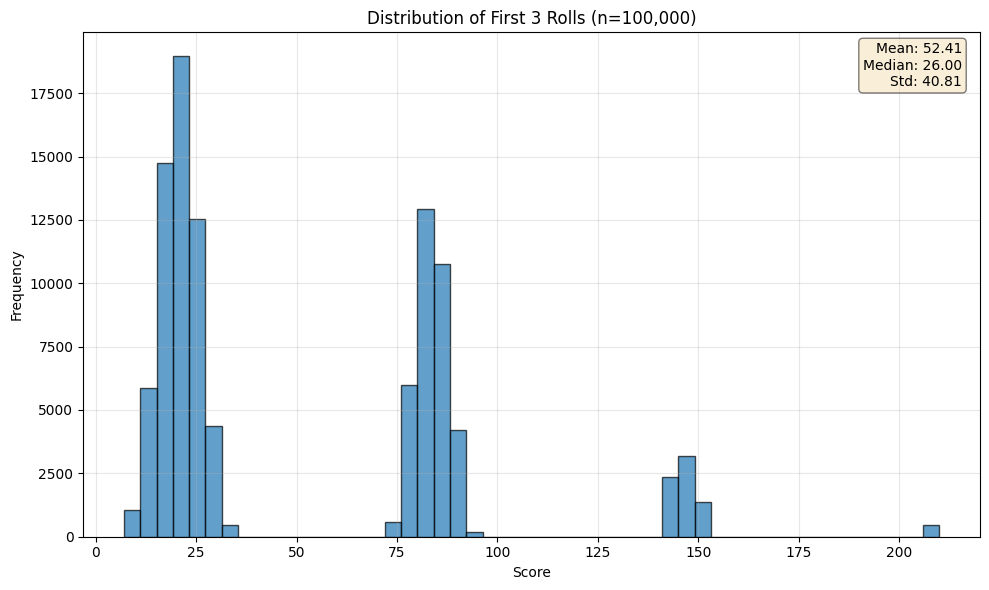

In [40]:
# Example usage:
scores =plot_first_rolls_histogram(n_samples=100000)


In [41]:
def score_after_additional_rolls(n_additional_rolls):
    """
    Calculate the score after doing n additional rolls after the first 3 rolls.
    
    Parameters:
    -----------
    n_additional_rolls : int
        Number of additional rolls to perform after the first 3 rolls
    
    Returns:
    --------
    int : The final score (0 if a 7 is rolled at any point)
    """
    # Start with the first 3 rolls
    score = first_rolls()
    
    # Perform additional rolls
    for _ in range(n_additional_rolls):
        rol = roll()
        dice_sum = sum(rol)
        
        # If a 7 is rolled, score becomes 0 and we stop
        if dice_sum == 7:
            return 0
        
        # If doubles (same value on both dice), double the score
        if rol[0] == rol[1]:
            score *= 2
        else:
            # Otherwise, add the sum to the score
            score += dice_sum
    
    return score


In [42]:
def plot_additional_rolls_distributions(additional_rolls_list, n_samples=100000, bins=50, figsize=(15, 40)):
    """
    Plot distributions for scores after doing different numbers of additional rolls.
    Creates an 8x2 layout (8 rows, 2 columns) where:
    - Left column: includes zeros
    - Right column: excludes zeros
    
    Parameters:
    -----------
    additional_rolls_list : list of int
        List of numbers of additional rolls to simulate (should have 8 elements for full 8x2 layout)
    n_samples : int, default=100000
        Number of samples to generate for each distribution
    bins : int, default=50
        Number of bins for the histograms
    figsize : tuple, default=(15, 20)
        Figure size (width, height) in inches
    
    Returns:
    --------
    dict : Dictionary with keys as number of additional rolls and values as score arrays
    """
    n_rows = 8
    n_cols = 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    results = {}
    
    for row_idx, n_rolls in enumerate(additional_rolls_list):
        if row_idx >= n_rows:
            break
            
        # Generate samples for this number of additional rolls
        scores = [score_after_additional_rolls(n_rolls) for _ in range(n_samples)]
        results[n_rolls] = scores
        
        # Left column: include zeros
        ax_left = axes[row_idx, 0]
        ax_left.hist(scores, bins=bins, edgecolor='black', alpha=0.7)
        ax_left.set_xlabel('Score')
        ax_left.set_ylabel('Frequency')
        ax_left.set_title(f'{n_rolls} roll(s) - Including Zeros (n={n_samples:,})')
        ax_left.grid(True, alpha=0.3)
        
        # Statistics for all scores (including zeros)
        mean_score = np.mean(scores)
        median_score = np.median(scores)
        std_score = np.std(scores)
        zero_percent = 100 * np.sum(np.array(scores) == 0) / len(scores)
        
        stats_text = f'Mean: {mean_score:.2f}\nMedian: {median_score:.2f}\nStd: {std_score:.2f}\nZero: {zero_percent:.2f}%'
        ax_left.text(0.98, 0.98, stats_text, transform=ax_left.transAxes,
                     verticalalignment='top', horizontalalignment='right',
                     bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        # Right column: exclude zeros
        ax_right = axes[row_idx, 1]
        scores_no_zeros = [s for s in scores if s != 0]
        
        if len(scores_no_zeros) > 0:
            ax_right.hist(scores_no_zeros, bins=bins, edgecolor='black', alpha=0.7)
            
            # Statistics for non-zero scores
            mean_no_zero = np.mean(scores_no_zeros)
            median_no_zero = np.median(scores_no_zeros)
            std_no_zero = np.std(scores_no_zeros)
            n_no_zero = len(scores_no_zeros)
            
            stats_text_no_zero = f'Mean: {mean_no_zero:.2f}\nMedian: {median_no_zero:.2f}\nStd: {std_no_zero:.2f}\nN: {n_no_zero:,}'
            ax_right.text(0.98, 0.98, stats_text_no_zero, transform=ax_right.transAxes,
                         verticalalignment='top', horizontalalignment='right',
                         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
        else:
            ax_right.text(0.5, 0.5, 'No non-zero scores', transform=ax_right.transAxes,
                         horizontalalignment='center', verticalalignment='center')
        
        ax_right.set_xlabel('Score')
        ax_right.set_ylabel('Frequency')
        ax_right.set_title(f'{n_rolls} roll(s) - Excluding Zeros')
        ax_right.grid(True, alpha=0.3)
    
    # Hide any unused rows
    for row_idx in range(len(additional_rolls_list), n_rows):
        axes[row_idx, 0].axis('off')
        axes[row_idx, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return results


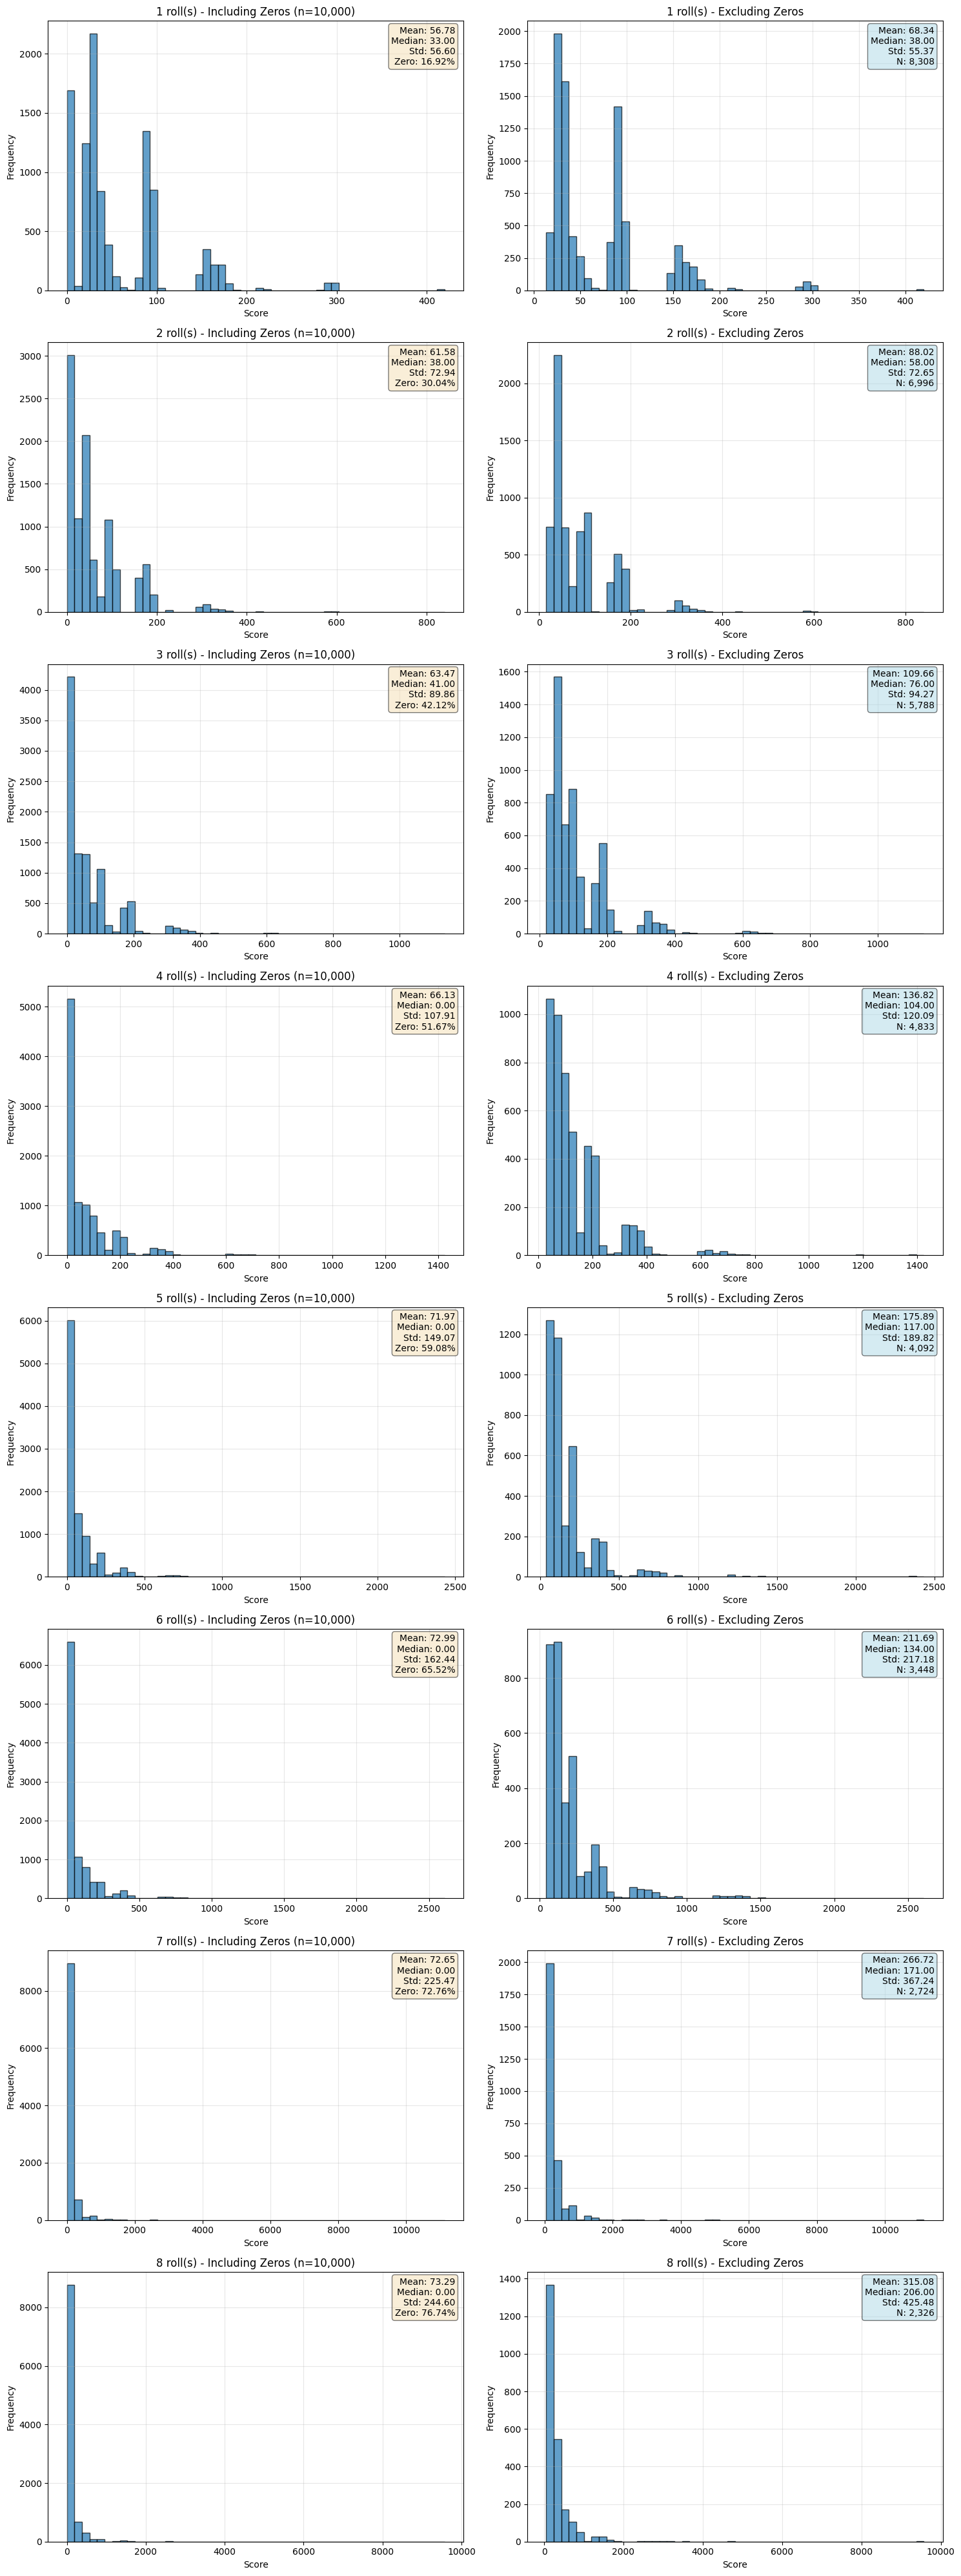

In [43]:
# Example usage: plot distributions for 1-8 additional rolls after the first 3 rolls
# Left column shows distributions including zeros, right column excludes zeros
results = plot_additional_rolls_distributions([1, 2, 3, 4, 5, 6, 7, 8], n_samples=10000)


In [44]:
def play_round_with_threshold(threshold):
    """
    Play a single round with a threshold player.
    The player banks when the current score >= threshold.
    
    Parameters:
    -----------
    threshold : int
        The threshold at which the player will bank
    
    Returns:
    --------
    int : The score banked in this round (0 if a 7 is rolled before banking)
    """
    # Start with the first 3 rolls
    score = first_rolls()
    
    # Check if we should bank immediately after first 3 rolls
    if score >= threshold:
        return score
    
    # Continue rolling until we hit threshold or a 7
    while True:
        rol = roll()
        dice_sum = sum(rol)
        
        # If a 7 is rolled, score becomes 0 and round ends
        if dice_sum == 7:
            return 0
        
        # If doubles (same value on both dice), double the score
        if rol[0] == rol[1]:
            score *= 2
        else:
            # Otherwise, add the sum to the score
            score += dice_sum
        
        # Check if we should bank now
        if score >= threshold:
            return score


In [45]:
def play_game_with_threshold(threshold, n_rounds):
    """
    Play a full game (multiple rounds) with a threshold player.
    
    Parameters:
    -----------
    threshold : int
        The threshold at which the player will bank in each round
    n_rounds : int
        Number of rounds to play
    
    Returns:
    --------
    int : The total score after all rounds
    """
    total_score = 0
    for _ in range(n_rounds):
        round_score = play_round_with_threshold(threshold)
        total_score += round_score
    return total_score


In [46]:
def plot_threshold_player_scores(threshold, n_rounds, n_trials=10000, bins=50, figsize=(12, 8)):
    """
    Plot the distribution of final scores for a threshold player across multiple trials.
    
    Parameters:
    -----------
    threshold : int
        The threshold at which the player will bank in each round
    n_rounds : int
        Number of rounds per game
    n_trials : int, default=10000
        Number of game simulations to run
    bins : int, default=50
        Number of bins for the histogram
    figsize : tuple, default=(12, 8)
        Figure size (width, height) in inches
    
    Returns:
    --------
    np.array : Array of final scores from all trials
    """
    # Run simulations
    print(f"Running {n_trials:,} simulations with threshold={threshold}, rounds={n_rounds}...")
    final_scores = [play_game_with_threshold(threshold, n_rounds) for _ in range(n_trials)]
    final_scores = np.array(final_scores)
    print("Done!")
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.hist(final_scores, bins=bins, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_xlabel('Final Score', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'Threshold Player Score Distribution\nThreshold: {threshold}, Rounds: {n_rounds}, Trials: {n_trials:,}', 
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add statistics text
    mean_score = np.mean(final_scores)
    median_score = np.median(final_scores)
    std_score = np.std(final_scores)
    min_score = np.min(final_scores)
    max_score = np.max(final_scores)
    zero_percent = 100 * np.sum(final_scores == 0) / len(final_scores)
    
    stats_text = (
        f'Mean: {mean_score:.2f}\n'
        f'Median: {median_score:.2f}\n'
        f'Std: {std_score:.2f}\n'
        f'Min: {min_score}\n'
        f'Max: {max_score}\n'
        f'Zero: {zero_percent:.2f}%'
    )
    ax.text(0.98, 0.98, stats_text, transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
            fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    return final_scores


Running 1,000 simulations with threshold=100, rounds=10...
Done!


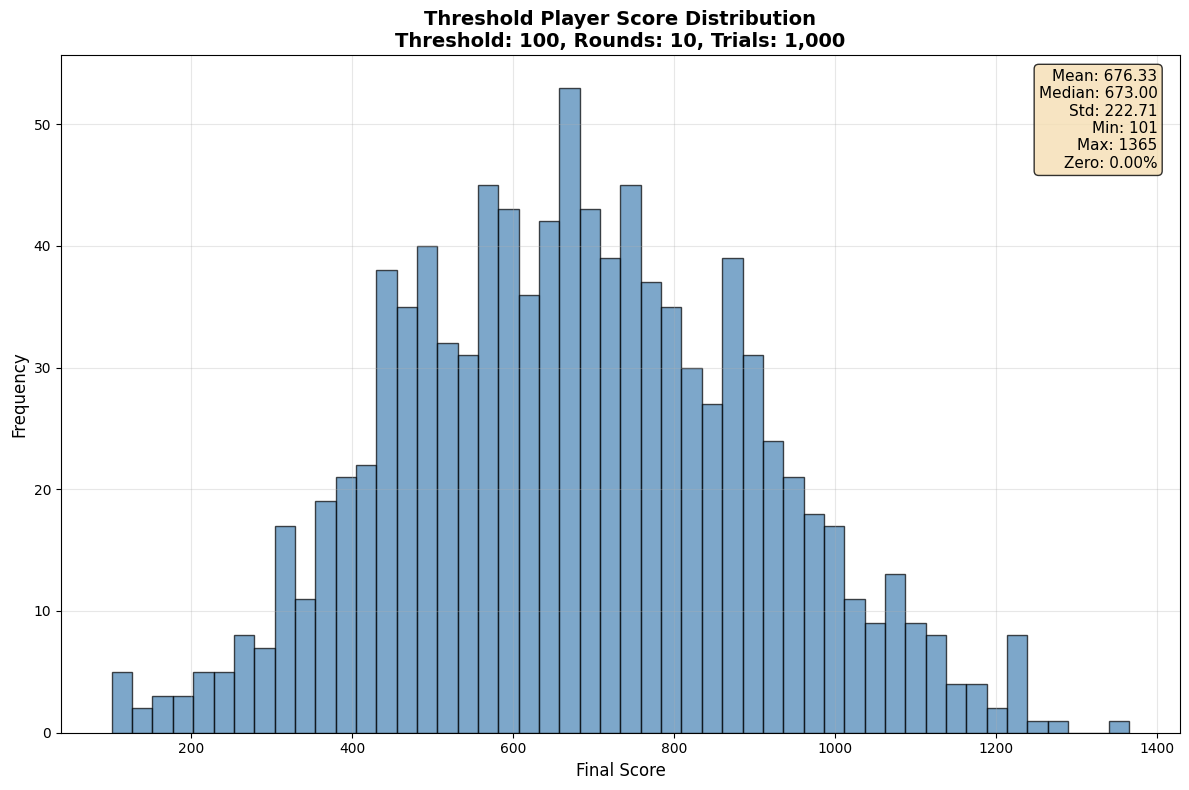

In [50]:
# Example usage: Plot score distribution for a threshold player
# You can adjust the threshold and number of rounds as needed
scores = plot_threshold_player_scores(threshold=100, n_rounds=10, n_trials=1000)


In [55]:
def plot_multiple_threshold_players(thresholds, n_rounds, n_trials=10000, bins=50, 
                                    figsize=(12, 8), alpha=0.35):
    """
    Plot the distributions of final scores for multiple threshold players on the same histogram.
    
    Parameters:
    -----------
    thresholds : list of int
        List of thresholds at which each player will bank in each round
    n_rounds : int
        Number of rounds per game
    n_trials : int, default=10000
        Number of game simulations to run for each threshold player
    bins : int, default=50
        Number of bins for the histogram
    figsize : tuple, default=(12, 8)
        Figure size (width, height) in inches
    alpha : float, default=0.35
        Transparency level for histograms (0-1), lower values = more transparent
    
    Returns:
    --------
    dict : Dictionary with keys as thresholds and values as score arrays
    """
    # Define distinct colors for different thresholds
    # Using a palette of highly distinct colors that work well when overlapped
    distinct_colors = [
        '#1f77b4',  # Blue
        '#ff7f0e',  # Orange
        '#2ca02c',  # Green
        '#d62728',  # Red
        '#9467bd',  # Purple
        '#8c564b',  # Brown
        '#e377c2',  # Pink
        '#7f7f7f',  # Gray
        '#bcbd22',  # Olive
        '#17becf',  # Cyan
        '#ff9896',  # Light Red
        '#c5b0d5',  # Light Purple
        '#c49c94',  # Light Brown
        '#f7b6d3',  # Light Pink
        '#dbdb8d',  # Light Olive
        '#9edae5'   # Light Cyan
    ]
    
    # Use distinct colors, cycling if needed
    colors = [distinct_colors[i % len(distinct_colors)] for i in range(len(thresholds))]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    results = {}
    all_scores = []
    
    # Simulate and plot each threshold player
    for idx, threshold in enumerate(thresholds):
        print(f"Running {n_trials:,} simulations with threshold={threshold}, rounds={n_rounds}...")
        final_scores = np.array([play_game_with_threshold(threshold, n_rounds) 
                                 for _ in range(n_trials)])
        results[threshold] = final_scores
        all_scores.extend(final_scores)
        print(f"Done! Mean score: {np.mean(final_scores):.2f}")
    
    # Determine common bin edges for all histograms
    min_score = min(all_scores)
    max_score = max(all_scores)
    bin_edges = np.linspace(min_score, max_score, bins + 1)
    
    # Plot each threshold player's histogram
    for idx, threshold in enumerate(thresholds):
        scores = results[threshold]
        ax.hist(scores, bins=bin_edges, alpha=alpha, label=f'Threshold = {threshold}',
               color=colors[idx], edgecolor='black', linewidth=0.5)
    
    ax.set_xlabel('Final Score', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title(f'Threshold Players Score Distribution Comparison\nRounds: {n_rounds}, Trials per Player: {n_trials:,}', 
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best', fontsize=11)
    
    # Add summary statistics table
    stats_lines = ['Statistics Summary:']
    for threshold in thresholds:
        scores = results[threshold]
        mean_score = np.mean(scores)
        median_score = np.median(scores)
        zero_percent = 100 * np.sum(scores == 0) / len(scores)
        stats_lines.append(f'Thresh={threshold}: Mean={mean_score:.1f}, Med={median_score:.1f}, Zero={zero_percent:.1f}%')
    
    stats_text = '\n'.join(stats_lines)
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='left',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
            fontsize=10, family='monospace')
    
    plt.tight_layout()
    plt.show()
    
    return results


Running 2,000 simulations with threshold=100, rounds=10...
Done! Mean score: 664.32
Running 2,000 simulations with threshold=300, rounds=10...
Done! Mean score: 756.54


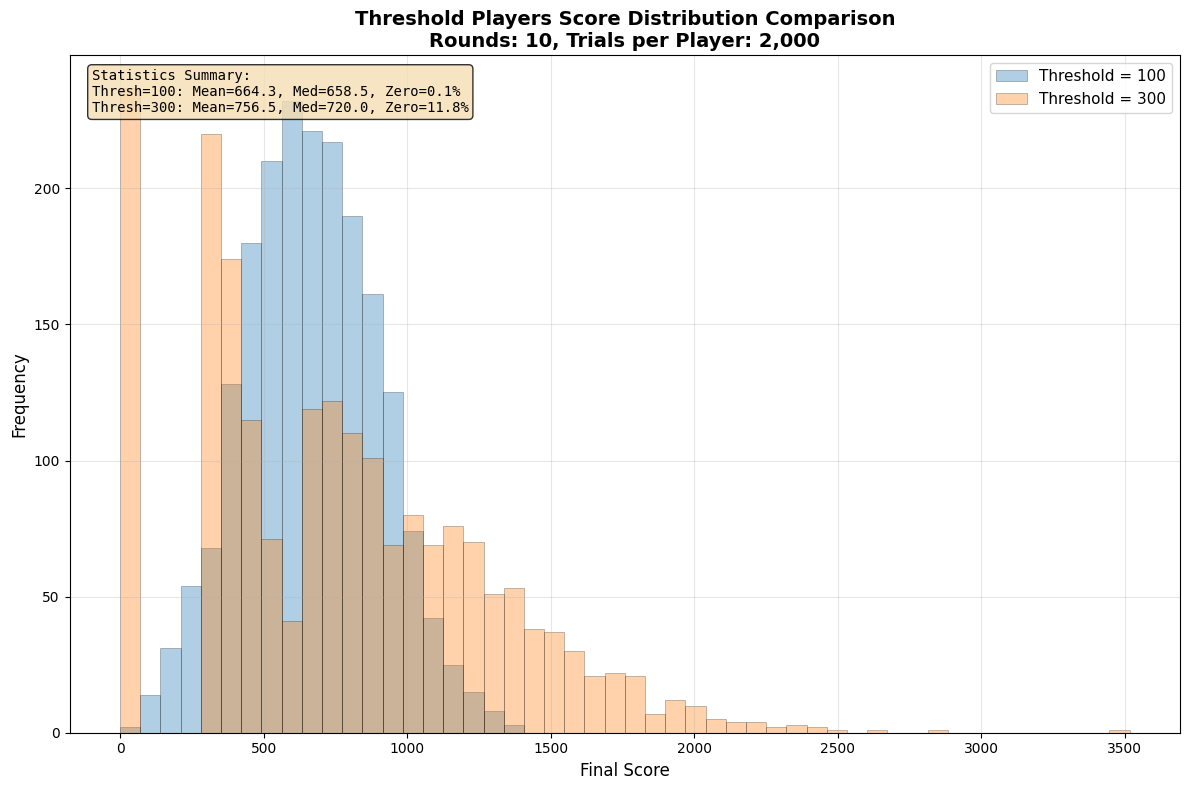

In [62]:
# Example usage: Plot multiple threshold players on the same histogram
# You can specify any list of thresholds to compare
results = plot_multiple_threshold_players(thresholds=[100, 300], 
                                          n_rounds=10, 
                                          n_trials=2000)
